# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X))))`

### Part1: Perceptron

E_train is 0.0, E_test is 0.0135205
Average number of iterations is 132.175.


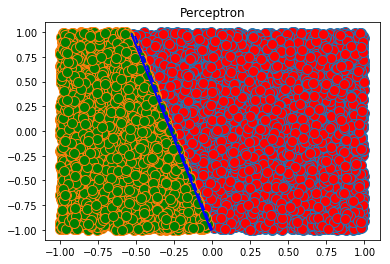

In [5]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of testing data

mistake_train = 0
mistake_test = 0
iter_sum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    X_train = X[:, :nTrain]
    X_test = X[:, nTrain:]
    y_train = y[:, :nTrain]
    y_test = y[:, nTrain:]
    
    # Train
    w_g, iters = perceptron(X_train, y_train)
    preds_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    
    # Test
    preds_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    # Compute training, testing error
    mistake_train += sum(1 for k in range(nTrain) if preds_train[0, k] != y_train[0, k])
    mistake_test += sum(1 for k in range(nTest) if preds_test[0, k] != y_test[0, k])
    
    # Sum up number of iterations
    iter_sum += iters
    
E_train = mistake_train / (nRep * nTrain)
E_test = mistake_test / (nRep * nTest)
avgIter = iter_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Perceptron')

### Part2: Perceptron: Non-linearly separable case

E_train is 0.18573, E_test is 0.1281081
Average number of iterations is 1000.0.


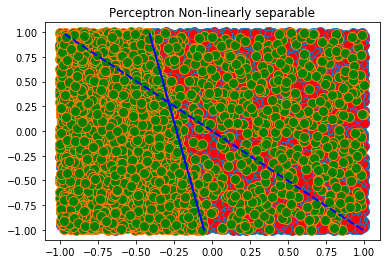

In [10]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 10000 # number of testing data

mistake_train = 0
mistake_test = 0
iter_sum = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')
    X_train = X[:, :nTrain]
    X_test = X[:, nTrain:]
    y_train = y[:, :nTrain]
    
    # Testing samples don't contain noise!
    y_test = np.sign(np.matmul(w_f.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    # Train
    w_g, iters = perceptron(X_train, y_train)
    preds_train = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_train.shape[1])), X_train))))
    
    # Test
    preds_test = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test))))
    
    # Compute training, testing error
    mistake_train += sum(1 for k in range(nTrain) if preds_train[0, k] != y_train[0, k])
    mistake_test += sum(1 for k in range(nTest) if preds_test[0, k] != y_test[0, k])
    
    # Sum up number of iterations
    iter_sum += iters
    
E_train = mistake_train / (nRep * nTrain)
E_test = mistake_test / (nRep * nTest)
avgIter = iter_sum / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Perceptron Non-linearly separable')


### Part3: Linear Regression

In [ ]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

In [ ]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y);
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [ ]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
# Compute training, testing error
# print('E_train is {}, E_test is {}'.format(E_train, E_test))

## Part6: Logistic Regression

In [ ]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    # Sum up number of support vectors

# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.